In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


In [2]:
import pandas as pd

df_hotspots = pd.read_csv('data/round3/hotspots/savinase_casein_hotspots.csv')

# sort by pos
df_hotspots = df_hotspots.sort_values(by='pos')
df_hotspots.head()

,pos,mut_aas,ref
34,1,"['M','G','N','S','Q','A','D']",A
0,2,"['K', 'L', 'Q','A','E','D']",Q
1,3,"['L', 'A', 'C', 'T', 'V', 'Y', 'S','N','E']",S
66,4,"['T','I','V','Y','L']",V
115,5,"['S','P']",P


In [3]:
import numpy as np
size_search_space_log = np.sum([np.log(len(row.mut_aas.split(','))) for i, row in df_hotspots.iterrows()])

print(f'number of positions: {len(df_hotspots)}, search space size: {np.exp(size_search_space_log):.2e}')

number of positions: 116, search space size: 8.76e+77


In [4]:
def convert_df_hotspot_to_heatmap_df(df_hotspot):
    NAT_AAS = list("ACDEFGHIKLMNPQRSTVWY")

    df_heatmap = pd.DataFrame(index=df_hotspot.pos, columns=NAT_AAS, data=0)
    for pos, mut_aas in zip(df_hotspot.pos, df_hotspot.mut_aas):
        for mut_aa in mut_aas:
            if mut_aa in NAT_AAS:
                df_heatmap.loc[pos, mut_aa] = 1
    df_heatmap = df_heatmap.astype(int)
    df_heatmap['pos'] = df_heatmap.index
    df_heatmap = df_heatmap.reset_index(drop=True)
    # transpose the dataframe for better visualization
    df_heatmap = df_heatmap.set_index('pos').T
    return df_heatmap
df_heatmap = convert_df_hotspot_to_heatmap_df(df_hotspots)
df_heatmap.head()

pos,1,2,3,4,5,9,10,11,12,14,...,249,250,253,254,255,256,259,265,268,269
A,1,1,1,0,0,1,0,0,1,0,...,1,0,1,1,1,0,0,1,1,0
C,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,1,1,0,0,0,1,0,0,0,1,...,1,1,1,0,1,1,0,1,0,0
E,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
F,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


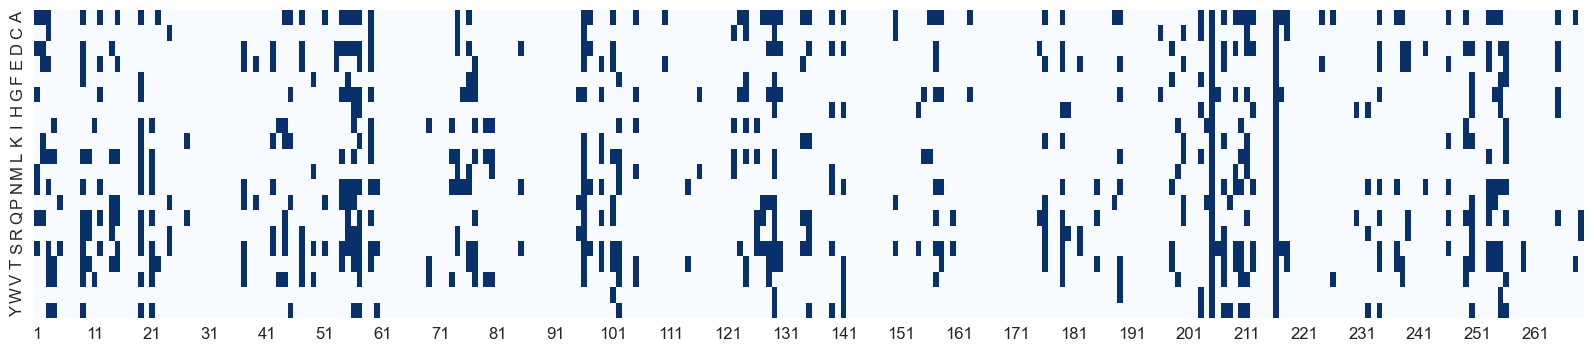

In [5]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns

seq_len = 269
df_heatmap2 = df_heatmap.reindex(columns=range(1, seq_len + 1), fill_value=0)

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax(figsize=(20, 4))
# plot_style_utils.prettify_ax(ax)

sns.heatmap(df_heatmap2, cmap='Blues', cbar=False, ax=ax) # Label for the color bar

# show AAs on the y-axis
ax.set_yticks([x + 0.5 for x in range(len(df_heatmap2.index))])  # Set y-ticks to the middle of each row
ax.set_yticklabels(df_heatmap2.index, fontsize=12)  # Set y-t

ax.set_xticks([x + 0.5 for x in range(0, len(df_heatmap2.columns), 10)])  # Set x-ticks to the middle of each column
ax.set_xticklabels(df_heatmap2.columns[::10], fontsize=12, rotation=0,)  # Set x-tick labels to the positions, every 10th position

ax.set_xlabel('')

plot_style_utils.save_for_pub(fig, path='figures/round3/hotspot_r3_mutation_heatmap_v2')